# Retrieving data from OpenFoodFacts

<br>

**Objective of this notebook** 

Understanding how to retrieve data from OpenFoodFacts. More specifically, we need to retrieve the type of packaging and the image of some products.

<br>

**Requirements**

`sudo pip install git+https://github.com/openfoodfacts/openfoodfacts-python` [more details here](https://github.com/openfoodfacts/openfoodfacts-python)

In [1]:
import openfoodfacts
from PIL import Image
import requests
from io import BytesIO

<br>

**Retrieving the list of all packagings**

In [8]:
packagings = openfoodfacts.facets.get_packaging()

In [38]:
def extract(information, raw_list):
    final_list = []
    for elt in raw_list:
        final_list.append(elt[information])
    return final_list

extract('id', packagings)[:10]

['plastique',
 'carton',
 'sachet',
 'frais',
 'verre',
 'bouteille',
 'barquette',
 'boite',
 'metal',
 'bocal']

<br>

**Retrieving information on specific products**

_Example 1 - [Coquillettes](https://fr.openfoodfacts.org/produit/8076808140325/pates-coquillettes-barilla)_

In [2]:
coquillettes = openfoodfacts.products.get_product('8076808140325')

In [3]:
coquillettes['product']

{'interface_version_modified': '20150316.jqm2',
 'stores': 'Auchan,Franprix,Magasins U,Leclerc',
 'unique_scans_n': 148,
 'categories': "Aliments et boissons à base de végétaux, Aliments d'origine végétale, Céréales et pommes de terre, Céréales et dérivés, Pâtes alimentaires, Pâtes sèches, Pâtes de blé, Pâtes de blé dur, Coquillettes, Coquillettes de blé dur",
 'cities_tags': [],
 'last_modified_t': 1572860321,
 'selected_images': {'ingredients': {'thumb': {'fr': 'https://static.openfoodfacts.org/images/products/807/680/814/0325/ingredients_fr.7.100.jpg'},
   'display': {'fr': 'https://static.openfoodfacts.org/images/products/807/680/814/0325/ingredients_fr.7.400.jpg'},
   'small': {'fr': 'https://static.openfoodfacts.org/images/products/807/680/814/0325/ingredients_fr.7.200.jpg'}},
  'nutrition': {'thumb': {'fr': 'https://static.openfoodfacts.org/images/products/807/680/814/0325/nutrition_fr.27.100.jpg'},
   'display': {'fr': 'https://static.openfoodfacts.org/images/products/807/680/8

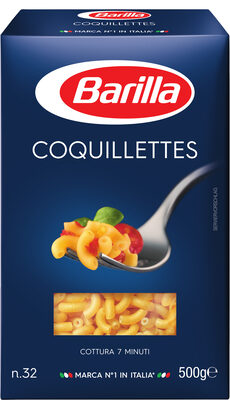

In [33]:
url_coquillettes = coquillettes['product']['image_url']
img_coquillettes = Image.open(BytesIO(requests.get(url_coquillettes).content))
img_coquillettes

In [43]:
packaging_coquillettes = coquillettes['product']['packaging'].split(',')
packaging_coquillettes

['Boîte', 'Carton', 'boîte']

_Example 2 - [Saucisses de Francfort](https://fr.openfoodfacts.org/produit/20012878/saucisses-de-francfort-fumees-saint-alby)_

In [39]:
saucisses = openfoodfacts.products.get_product('20012878')

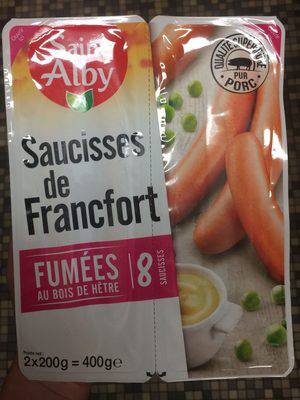

In [40]:
url_saucisses = saucisses['product']['image_url']
img_saucisses = Image.open(BytesIO(requests.get(url_saucisses).content))
img_saucisses

In [45]:
packaging_saucisses = saucisses['product']['packaging'].split(',')
packaging_saucisses

['Barquette', 'Plastique', 'Frais', 'stück', 'Kunststoff', 'O', '07']